<a href="https://colab.research.google.com/github/brotheramin/MachineLearning/blob/main/SepsisMiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# data manipulation libraries
import numpy as np # linear algebra
import pandas as pd # data processing

# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning methods
from sklearn.model_selection import train_test_split # data splitting into train and test
from sklearn.preprocessing import FunctionTransformer


from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score

In [7]:
df = pd.read_csv('feature_combined.csv')

In [ ]:
df.head().T

,0,1,2,3,4
X_0,1.500000,2.227147,4.000000,0.000000,4.000000
X_1,140.000000,140.000000,140.000000,138.000000,140.000000
X_2,138.000000,138.250000,138.500000,138.000000,138.500000
X_3,137.000000,137.000000,138.000000,138.000000,138.000000
X_4,1.414214,1.129338,2.000000,0.000000,2.000000
...,...,...,...,...,...
X_103,0.015385,0.006593,-0.001099,-0.027473,-0.037363
X_104,0.650444,0.650444,0.776250,1.235168,1.281025
offset,-660.000000,-655.000000,-650.000000,-645.000000,-640.000000
id,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79800 entries, 0 to 79799
Columns: 108 entries, X_0 to label
dtypes: float64(93), int64(15)
memory usage: 65.8 MB


In [ ]:
df.nunique()

X_0       1372
X_1        137
X_2        513
X_3        135
X_4       1841
          ... 
X_103     1147
X_104     4182
offset     133
id         600
label        2
Length: 108, dtype: int64

In [ ]:
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
X_0,79800.0,0.155129,3.047073,-6.000000,-1.289256,0.00000,2.602498,4.000000
X_1,79800.0,89.397506,20.258613,0.000000,75.000000,88.00000,102.000000,177.000000
X_2,79800.0,87.264355,19.951703,0.000000,72.750000,85.50000,99.750000,177.000000
X_3,79800.0,85.344023,19.978456,0.000000,71.000000,84.00000,98.000000,177.000000
X_4,79800.0,0.145070,1.102048,-2.000000,-0.228728,0.00000,0.854563,2.000000
...,...,...,...,...,...,...,...,...
X_103,79800.0,0.000516,0.100430,-2.241758,-0.029670,0.00000,0.030769,2.209890
X_104,79800.0,2.405792,2.542446,0.000000,1.068188,1.83275,3.004270,50.647474
offset,79800.0,-330.000000,191.964741,-660.000000,-495.000000,-330.00000,-165.000000,0.000000
id,79800.0,300.500000,173.205925,1.000000,150.750000,300.50000,450.250000,600.000000


In [ ]:
df["label"].value_counts()

1    39900
0    39900
Name: label, dtype: int64

In [ ]:
# Create (X_train, y_train), (X_test, y_test)

as_np = df.to_numpy()

index = int(len(as_np) * .80)

X_train, y_train = as_np[:index, :-1], as_np[:index, -1]
X_test, y_test = as_np[index:, :-1], as_np[index:, -1]

(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((63840, 107), (63840,)), ((15960, 107), (15960,)))

In [ ]:
df1 = df.loc[df['offset'] == 0]

In [ ]:
df1.head()

,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,...,X_98,X_99,X_100,X_101,X_102,X_103,X_104,offset,id,label
132,-1.200000,127,125.50,124,0.000000,0.20,1.290994,-0.056816,127,124.857143,...,1.772306,19,16.923077,16,1.085143,0.028571,0.862316,0,1,1
265,4.000000,86,85.25,85,2.000000,-0.02,0.500000,-1.317901,90,86.857143,...,-0.707671,20,15.846154,13,0.634795,-0.054945,2.409915,0,2,1
398,4.000000,106,105.25,105,2.000000,0.02,0.500000,3.000000,106,105.000000,...,0.060937,32,30.307692,28,-0.722135,0.012088,1.109400,0,3,1
531,-3.109816,105,98.75,94,0.456508,-0.14,5.188127,-0.077303,105,96.285714,...,-1.039498,21,16.615385,14,0.449215,0.078022,2.433737,0,4,1
664,0.000000,77,77.00,77,0.000000,0.00,0.000000,7.000000,77,76.857143,...,1.798440,23,16.076923,11,0.845429,-0.015385,2.985005,0,5,1


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 132 to 79799
Columns: 108 entries, X_0 to label
dtypes: float64(93), int64(15)
memory usage: 510.9 KB


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df1.drop("label", axis=1), df1["label"], test_size=0.2, random_state=42)

**Logestic Regression**

In [ ]:
model = LogisticRegression().fit(X_train, y_train)
test_predictions = model.predict(X_test)
test_predictions

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


array([1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

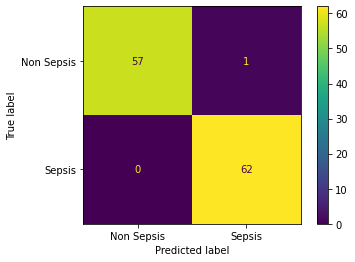

In [ ]:
# Display Confusion Matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, test_predictions, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Non Sepsis', 'Sepsis'])
disp.plot()

In [ ]:
# Get TNs, FPs, FNs, TPs

tn, fp, fn, tp = cm.ravel()

s = """
True Negatives: {0}
False Positives: {1}
False Negatives: {2}
True Positives: {3}
""".format(tn, fp, fn, tp)

print(s)


True Negatives: 57
False Positives: 1
False Negatives: 0
True Positives: 62



**Accuracy**

In [ ]:
def accuracy(tn, fp, fn, tp):
  return (tp + tn) / (tp + tn + fp + fn)

"Accuracy: {0}".format(accuracy(tn, fp, fn, tp))

'Accuracy: 0.9916666666666667'

**Sensitivity**

In [ ]:
def tpr(tn, fp, fn, tp):
  return tp / (tp + fn)

"True Positive Rate: {0}".format(tpr(tn, fp, fn, tp))

'True Positive Rate: 1.0'

**False Negative Rate**

In [ ]:
def fnr(tn, fp, fn, tp):
  return fn / (tp + fn)

"False Negative Rate: {0}".format(fnr(tn, fp, fn, tp))

'False Negative Rate: 0.0'

**Specificity**

In [ ]:
def tnr(tn, fp, fn, tp):
  return tn / (tn + fp)

"Specificity: {0}".format(tnr(tn, fp, fn, tp))

'Specificity: 0.9827586206896551'

**False Positive Rate**

In [ ]:
def fpr(tn, fp, fn, tp):
  return fp / (tn + fp)

"False Positive Rate: {0}".format(fpr(tn, fp, fn, tp))

'False Positive Rate: 0.017241379310344827'

**Negative Predictive Value**

In [ ]:
def npv(tn, fp, fn, tp):
  return tn / (tn + fn)

"Negative Predictive Value: {0}".format(npv(tn, fp, fn, tp))

'Negative Predictive Value: 1.0'

**Precision**

In [ ]:
def ppv(tn, fp, fn, tp):
  return tp / (tp + fp)

"Positive Predictive Value: {0}".format(ppv(tn, fp, fn, tp))

'Positive Predictive Value: 0.9841269841269841'

**Balanced Accuracy**

In [ ]:
def balanced_accuracy(tn, fp, fn, tp):
  tprr = tpr(tn, fp, fn, tp)
  tnrr = tnr(tn, fp, fn, tp)
  return (tprr + tnrr) / 2

"Balanced Accuracy: {0}".format(balanced_accuracy(tn, fp, fn, tp))

'Balanced Accuracy: 0.9913793103448276'

**F1**

In [ ]:
def f1(tn, fp, fn, tp):
  p = ppv(tn, fp, fn, tp)
  r = tpr(tn, fp, fn, tp)
  
  return (2*p*r) / (p + r)

"F1 Score: {0}".format(f1(tn, fp, fn, tp))

'F1 Score: 0.9919999999999999'

In [ ]:
# Get prediction probabilities

probabilities = model.predict_proba(X_test)[:, 1]

probabilities

array([1. , 0. , 0. , 1. , 1. , 0.6, 1. , 0. , 1. , 0. , 1. , 1. , 1. ,
       0. , 0. , 1. , 1. , 1. , 1. , 1. , 1. , 0. , 0. , 0. , 0. , 0. ,
       1. , 1. , 0. , 0. , 0. , 1. , 1. , 1. , 1. , 0. , 1. , 0. , 0. ,
       0.8, 0. , 1. , 0. , 0. , 1. , 1. , 0. , 1. , 1. , 0. , 1. , 1. ,
       1. , 0. , 0. , 0. , 1. , 1. , 1. , 1. , 1. , 1. , 0.2, 0. , 0. ,
       1. , 0. , 0. , 1. , 0.4, 0.2, 1. , 0. , 0. , 0. , 0. , 0.2, 1. ,
       0. , 0. , 1. , 0. , 0. , 0. , 1. , 1. , 1. , 1. , 0. , 1. , 1. ,
       0. , 1. , 0.6, 1. , 1. , 1. , 1. , 0. , 1. , 1. , 1. , 0. , 0. ,
       1. , 0. , 1. , 0.8, 1. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ,
       1. , 0. , 0. ])

In [ ]:
# Get predictions using normal threshold of 0.5

pd.value_counts(probabilities > 0.5)

True     63
False    57
dtype: int64

In [ ]:
# Generate 2000 evenly-separated thresholds

import numpy as np

thresholds = np.linspace(0, 1, num=2000).astype(np.float16)

thresholds

array([0.000e+00, 5.002e-04, 1.000e-03, ..., 9.990e-01, 9.995e-01,
       1.000e+00], dtype=float16)

In [ ]:
# Get test predictions array for each threshold

all_predictions = np.array([(probabilities > t).astype(int) for t in thresholds])

all_predictions.shape

(2000, 120)

In [ ]:
# Show distribution depending on threshold

pd.value_counts(all_predictions[0])

1    67
0    53
dtype: int64

In [ ]:
# Get confusion matrices, true positive rates, and false positive rates for each threshold

confusion_matrices = [confusion_matrix(y_test, predictions) for predictions in all_predictions]
tn_fp_fn_tps = [cm.ravel() for cm in confusion_matrices]

tprs = [tpr(tn, fp, fn, tp) for tn, fp, fn, tp in tn_fp_fn_tps]
fprs = [fpr(tn, fp, fn, tp) for tn, fp, fn, tp in tn_fp_fn_tps]

In [ ]:
# Create Scatter Plot of ROC Curve

import plotly.express as px

px.scatter(x=fprs, y=tprs, color=thresholds, labels=dict(x='False Positive Rate', y='True Positive Rate', color='Threshold'), title='ROC Curve')

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier().fit(X_train, y_train)
test_predictions = model.predict(X_test)
test_predictions

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

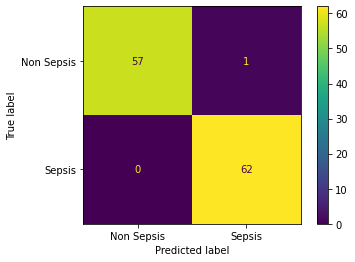

In [ ]:
cm = confusion_matrix(y_test, test_predictions, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Non Sepsis', 'Sepsis'])
disp.plot()

In [ ]:
tn, fp, fn, tp = cm.ravel()

s = """
True Negatives: {0}
False Positives: {1}
False Negatives: {2}
True Positives: {3}
""".format(tn, fp, fn, tp)

print(s)


True Negatives: 57
False Positives: 1
False Negatives: 0
True Positives: 62



**Accuracy**

In [ ]:
def accuracy(tn, fp, fn, tp):
  return (tp + tn) / (tp + tn + fp + fn)

"Accuracy: {0}".format(accuracy(tn, fp, fn, tp))

'Accuracy: 0.9916666666666667'

**Sensitivity**

In [ ]:
def tpr(tn, fp, fn, tp):
  return tp / (tp + fn)

"True Positive Rate: {0}".format(tpr(tn, fp, fn, tp))

'True Positive Rate: 1.0'

**False Negative Rate**

In [ ]:
def fnr(tn, fp, fn, tp):
  return fn / (tp + fn)

"False Negative Rate: {0}".format(fnr(tn, fp, fn, tp))

'False Negative Rate: 0.0'

**Specificity**

In [ ]:
def tnr(tn, fp, fn, tp):
  return tn / (tn + fp)

"Specificity: {0}".format(tnr(tn, fp, fn, tp))

'Specificity: 0.9827586206896551'

**False Positive Rate**

In [ ]:
def fpr(tn, fp, fn, tp):
  return fp / (tn + fp)

"False Positive Rate: {0}".format(fpr(tn, fp, fn, tp))

'False Positive Rate: 0.017241379310344827'

**Negative Predictive Value**

In [ ]:
def npv(tn, fp, fn, tp):
  return tn / (tn + fn)

"Negative Predictive Value: {0}".format(npv(tn, fp, fn, tp))

'Negative Predictive Value: 1.0'

**Precision**

In [ ]:
def ppv(tn, fp, fn, tp):
  return tp / (tp + fp)

"Positive Predictive Value: {0}".format(ppv(tn, fp, fn, tp))

'Positive Predictive Value: 0.9841269841269841'

**Balanced Accuracy**

In [ ]:
def balanced_accuracy(tn, fp, fn, tp):
  tprr = tpr(tn, fp, fn, tp)
  tnrr = tnr(tn, fp, fn, tp)
  return (tprr + tnrr) / 2

"Balanced Accuracy: {0}".format(balanced_accuracy(tn, fp, fn, tp))

'Balanced Accuracy: 0.9913793103448276'

**F1**

In [ ]:
def f1(tn, fp, fn, tp):
  p = ppv(tn, fp, fn, tp)
  r = tpr(tn, fp, fn, tp)
  
  return (2*p*r) / (p + r)

"F1 Score: {0}".format(f1(tn, fp, fn, tp))

'F1 Score: 0.9919999999999999'

**Random Forest**

In [ ]:
model = RandomForestClassifier().fit(X_train, y_train)
test_predictions = model.predict(X_test)
test_predictions

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

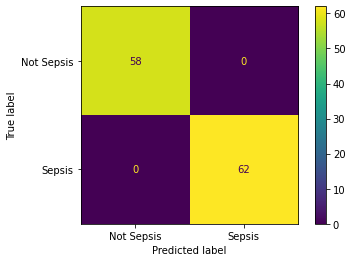

In [ ]:
cm = confusion_matrix(y_test, test_predictions, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Not Sepsis', 'Sepsis'])
disp.plot()

In [ ]:
tn, fp, fn, tp = cm.ravel()

s = """
True Negatives: {0}
False Positives: {1}
False Negatives: {2}
True Positives: {3}
""".format(tn, fp, fn, tp)

print(s)


True Negatives: 58
False Positives: 0
False Negatives: 0
True Positives: 62



**Accuracy**

In [ ]:
def accuracy(tn, fp, fn, tp):
  return (tp + tn) / (tp + tn + fp + fn)

"Accuracy: {0}".format(accuracy(tn, fp, fn, tp))

'Accuracy: 1.0'

**Sensitivity**

In [ ]:
def tpr(tn, fp, fn, tp):
  return tp / (tp + fn)

"True Positive Rate: {0}".format(tpr(tn, fp, fn, tp))

'True Positive Rate: 1.0'

**False Negative Rate**

In [ ]:
def fnr(tn, fp, fn, tp):
  return fn / (tp + fn)

"False Negative Rate: {0}".format(fnr(tn, fp, fn, tp))

'False Negative Rate: 0.0'

**Specificity**

In [ ]:
def tnr(tn, fp, fn, tp):
  return tn / (tn + fp)

"Specificity: {0}".format(tnr(tn, fp, fn, tp))

'Specificity: 1.0'

**False Positive Rate**

In [ ]:
def fpr(tn, fp, fn, tp):
  return fp / (tn + fp)

"False Positive Rate: {0}".format(fpr(tn, fp, fn, tp))

'False Positive Rate: 0.0'

**Negative Predictive Value**

In [ ]:
def npv(tn, fp, fn, tp):
  return tn / (tn + fn)

"Negative Predictive Value: {0}".format(npv(tn, fp, fn, tp))

'Negative Predictive Value: 1.0'

**Precision**

In [ ]:
def ppv(tn, fp, fn, tp):
  return tp / (tp + fp)

"Positive Predictive Value: {0}".format(ppv(tn, fp, fn, tp))

'Positive Predictive Value: 1.0'

**Balanced Accuracy**

In [ ]:
def balanced_accuracy(tn, fp, fn, tp):
  tprr = tpr(tn, fp, fn, tp)
  tnrr = tnr(tn, fp, fn, tp)
  return (tprr + tnrr) / 2

"Balanced Accuracy: {0}".format(balanced_accuracy(tn, fp, fn, tp))

'Balanced Accuracy: 1.0'

**F1**

In [ ]:
def f1(tn, fp, fn, tp):
  p = ppv(tn, fp, fn, tp)
  r = tpr(tn, fp, fn, tp)
  
  return (2*p*r) / (p + r)

"F1 Score: {0}".format(f1(tn, fp, fn, tp))

'F1 Score: 1.0'

**MLP**

In [ ]:
model = MLPClassifier().fit(X_train, y_train)
test_predictions = model.predict(X_test)
test_predictions

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

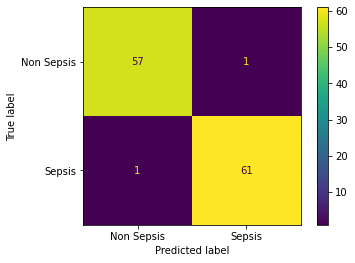

In [ ]:
cm = confusion_matrix(y_test, test_predictions, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Non Sepsis', 'Sepsis'])
disp.plot()

In [ ]:
tn, fp, fn, tp = cm.ravel()

s = """
True Negatives: {0}
False Positives: {1}
False Negatives: {2}
True Positives: {3}
""".format(tn, fp, fn, tp)

print(s)


True Negatives: 57
False Positives: 1
False Negatives: 1
True Positives: 61



**Accuracy**

In [ ]:
def accuracy(tn, fp, fn, tp):
  return (tp + tn) / (tp + tn + fp + fn)

"Accuracy: {0}".format(accuracy(tn, fp, fn, tp))

'Accuracy: 0.9833333333333333'

**Sensitivity**

In [ ]:
def tpr(tn, fp, fn, tp):
  return tp / (tp + fn)

"True Positive Rate: {0}".format(tpr(tn, fp, fn, tp))

'True Positive Rate: 0.9838709677419355'

**False Negative Rate**

In [ ]:
def fnr(tn, fp, fn, tp):
  return fn / (tp + fn)

"False Negative Rate: {0}".format(fnr(tn, fp, fn, tp))

'False Negative Rate: 0.016129032258064516'

**Specificity**

In [ ]:
def tnr(tn, fp, fn, tp):
  return tn / (tn + fp)

"Specificity: {0}".format(tnr(tn, fp, fn, tp))

'Specificity: 0.9827586206896551'

**False Positive Rate**

In [ ]:
def fpr(tn, fp, fn, tp):
  return fp / (tn + fp)

"False Positive Rate: {0}".format(fpr(tn, fp, fn, tp))

'False Positive Rate: 0.017241379310344827'

**Negative Predictive Value**

In [ ]:
def npv(tn, fp, fn, tp):
  return tn / (tn + fn)

"Negative Predictive Value: {0}".format(npv(tn, fp, fn, tp))

'Negative Predictive Value: 0.9827586206896551'

**Precision**

In [ ]:
def ppv(tn, fp, fn, tp):
  return tp / (tp + fp)

"Positive Predictive Value: {0}".format(ppv(tn, fp, fn, tp))

'Positive Predictive Value: 0.9838709677419355'

**Balanced Accuracy**

In [ ]:
def balanced_accuracy(tn, fp, fn, tp):
  tprr = tpr(tn, fp, fn, tp)
  tnrr = tnr(tn, fp, fn, tp)
  return (tprr + tnrr) / 2

"Balanced Accuracy: {0}".format(balanced_accuracy(tn, fp, fn, tp))

'Balanced Accuracy: 0.9833147942157954'

**F1**

In [ ]:
def f1(tn, fp, fn, tp):
  p = ppv(tn, fp, fn, tp)
  r = tpr(tn, fp, fn, tp)
  
  return (2*p*r) / (p + r)

"F1 Score: {0}".format(f1(tn, fp, fn, tp))

'F1 Score: 0.9838709677419355'

**Temporal Training and Testing**


In [8]:
import datetime

In [9]:
offset = df['offset']

In [10]:
df.index = pd.to_datetime(df['offset'], format='%M',errors='coerce')
df[:26]

,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,...,X_98,X_99,X_100,X_101,X_102,X_103,X_104,offset,id,label
offset,,,,,,,,,,,,,,,,,,,,,
NaT,1.500000,140,138.00,137,1.414214,0.12,1.414214,2.383471,140,137.142857,...,-0.332081,30,28.615385,28,0.571765,0.015385,0.650444,-660,1,1
NaT,2.227147,140,138.25,137,1.129338,0.02,1.258306,3.230769,140,137.714286,...,-0.332081,30,28.615385,28,0.571765,0.006593,0.650444,-655,1,1
NaT,4.000000,140,138.50,138,2.000000,-0.12,1.000000,2.712500,140,137.857143,...,0.195811,30,28.461538,27,0.149506,-0.001099,0.776250,-650,1,1
NaT,0.000000,138,138.00,138,0.000000,0.00,0.000000,3.000000,140,138.000000,...,3.347414,30,28.230769,25,-1.454693,-0.027473,1.235168,-645,1,1
NaT,4.000000,140,138.50,138,2.000000,0.12,1.000000,-0.743210,140,138.428571,...,2.045907,30,28.153846,25,-1.177590,-0.037363,1.281025,-640,1,1
NaT,-6.000000,140,139.00,138,0.000000,0.16,1.154701,-2.800000,140,138.857143,...,0.995446,30,27.846154,24,-1.218741,-0.065934,1.724633,-635,1,1
NaT,-6.000000,140,139.00,138,0.000000,0.00,1.154701,-0.840000,140,138.571429,...,0.936944,30,27.307692,22,-1.242225,-0.095604,2.323238,-630,1,1
NaT,-6.000000,140,139.00,138,0.000000,-0.16,1.154701,-0.840000,140,138.571429,...,-0.583894,30,26.846154,22,-0.801652,-0.110989,2.544476,-625,1,1
NaT,-6.000000,140,139.00,138,0.000000,0.00,1.154701,-2.800000,140,138.857143,...,-1.261133,30,26.307692,22,-0.485724,-0.126374,2.780426,-620,1,1


In [11]:
# [[[-660], [-600], [-540], [-480], [-420]]] [-360]
# [[[-600], [-540], [-480], [-420], [-360]]] [-300]
# [[[-540], [-480], [-420], [-360], [-300]]] [-240]
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [12]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(offset, WINDOW_SIZE)
X1.shape, y1.shape

((79795, 5, 1), (79795,))

In [13]:
X_train1, y_train1 = X1[:63840], y1[:63840]
X_val1, y_val1 = X1[63840:79795], y1[63840:79795]
X_test1, y_test1 = X1[79795:], y1[79795:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((63840, 5, 1), (63840,), (15955, 5, 1), (15955,), (0, 5, 1), (0,))

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [15]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [16]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10
1990/1995 [============================>.] - ETA: 0s - loss: 143293.6406 - root_mean_squared_error: 378.5415

1995/1995 [==============================] - 17s 7ms/step - loss: 143296.0469 - root_mean_squared_error: 378.5446 - val_loss: 138571.2656 - val_root_mean_squared_error: 372.2516
Epoch 2/10
1984/1995 [============================>.] - ETA: 0s - loss: 133115.4219 - root_mean_squared_error: 364.8499

1995/1995 [==============================] - 13s 7ms/step - loss: 133072.0000 - root_mean_squared_error: 364.7903 - val_loss: 127133.2578 - val_root_mean_squared_error: 356.5575
Epoch 3/10
1992/1995 [============================>.] - ETA: 0s - loss: 120758.9922 - root_mean_squared_error: 347.5039

1995/1995 [==============================] - 14s 7ms/step - loss: 120764.6016 - root_mean_squared_error: 347.5120 - val_loss: 113930.5000 - val_root_mean_squared_error: 337.5359
Epoch 4/10
1993/1995 [============================>.] - ETA: 0s - loss: 106794.4766 - root_mean_squared_error: 326.7943

1995/1995 [==============================] - 14s 7ms/step - loss: 106803.5312 - root_mean_squared_error: 326.8081 - val_loss: 99366.0625 - val_root_mean_squared_error: 315.2238
Epoch 5/10
1990/1995 [============================>.] - ETA: 0s - loss: 91947.2109 - root_mean_squared_error: 303.2280

1995/1995 [==============================] - 16s 8ms/step - loss: 91938.5078 - root_mean_squared_error: 303.2136 - val_loss: 84373.7812 - val_root_mean_squared_error: 290.4716
Epoch 6/10
1988/1995 [============================>.] - ETA: 0s - loss: 76854.2344 - root_mean_squared_error: 277.2260

1995/1995 [==============================] - 14s 7ms/step - loss: 76862.5078 - root_mean_squared_error: 277.2409 - val_loss: 69113.4688 - val_root_mean_squared_error: 262.8944
Epoch 7/10
1982/1995 [============================>.] - ETA: 0s - loss: 61586.8438 - root_mean_squared_error: 248.1670

1995/1995 [==============================] - 14s 7ms/step - loss: 61576.7930 - root_mean_squared_error: 248.1467 - val_loss: 54114.4062 - val_root_mean_squared_error: 232.6250
Epoch 8/10
1986/1995 [============================>.] - ETA: 0s - loss: 47312.6367 - root_mean_squared_error: 217.5147

1995/1995 [==============================] - 14s 7ms/step - loss: 47254.5078 - root_mean_squared_error: 217.3810 - val_loss: 40501.7109 - val_root_mean_squared_error: 201.2504
Epoch 9/10
1984/1995 [============================>.] - ETA: 0s - loss: 34423.6562 - root_mean_squared_error: 185.5361

1995/1995 [==============================] - 14s 7ms/step - loss: 34404.1719 - root_mean_squared_error: 185.4836 - val_loss: 28515.2676 - val_root_mean_squared_error: 168.8646
Epoch 10/10
1986/1995 [============================>.] - ETA: 0s - loss: 23455.7773 - root_mean_squared_error: 153.1528

1995/1995 [==============================] - 13s 7ms/step - loss: 23431.1660 - root_mean_squared_error: 153.0724 - val_loss: 18682.3086 - val_root_mean_squared_error: 136.6832


In [17]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [18]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

,Train Predictions,Actuals
0,-330.702881,-635
1,-330.699860,-630
2,-330.696716,-625
3,-330.693451,-620
4,-330.689972,-615
...,...,...
63835,-309.090790,-660
63836,-329.711121,-655
63837,-330.479431,-650
63838,-330.488678,-645


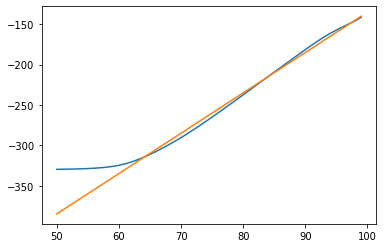

In [19]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [20]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

,Val Predictions,Actuals
0,-330.702881,-635
1,-330.699860,-630
2,-330.696716,-625
3,-330.693451,-620
4,-330.689972,-615
...,...,...
15950,-72.117966,-20
15951,-72.482254,-15
15952,-73.416122,-10
15953,-76.694191,-5


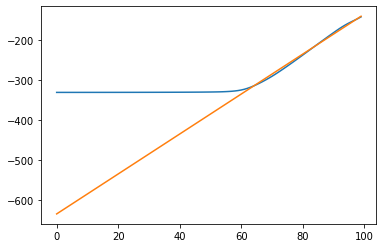

In [21]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [25]:
model2 = Sequential()
model2.add(InputLayer((5, 1)))
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 64)             192       
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 8)                 2056      
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,257
Trainable params: 2,257
Non-trainable params: 0
_________________________________________________________________


In [28]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [29]:
model2.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp2])

Epoch 1/10
1995/1995 [==============================] - 5s 2ms/step - loss: 13630.5527 - root_mean_squared_error: 116.7500 - val_loss: 4695.0723 - val_root_mean_squared_error: 68.5206
Epoch 2/10
1995/1995 [==============================] - 5s 2ms/step - loss: 3934.2390 - root_mean_squared_error: 62.7235 - val_loss: 3442.2019 - val_root_mean_squared_error: 58.6703
Epoch 3/10
1995/1995 [==============================] - 5s 2ms/step - loss: 3328.7473 - root_mean_squared_error: 57.6953 - val_loss: 3247.4260 - val_root_mean_squared_error: 56.9862
Epoch 4/10
1995/1995 [==============================] - 5s 2ms/step - loss: 3270.3875 - root_mean_squared_error: 57.1873 - val_loss: 3241.8521 - val_root_mean_squared_error: 56.9373
Epoch 5/10
1995/1995 [==============================] - 5s 2ms/step - loss: 3266.0940 - root_mean_squared_error: 57.1497 - val_loss: 3237.8123 - val_root_mean_squared_error: 56.9018
Epoch 6/10
1995/1995 [==============================] - 5s 2ms/step - loss: 3261.1777 - 

In [30]:
model3 = Sequential()
model3.add(InputLayer((5, 1)))
model3.add(GRU(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 13,393
Trainable params: 13,393
Non-trainable params: 0
_________________________________________________________________


In [31]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [32]:
model3.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp3])

Epoch 1/10
1994/1995 [============================>.] - ETA: 0s - loss: 145702.1094 - root_mean_squared_error: 381.7094

1995/1995 [==============================] - 14s 6ms/step - loss: 145691.1094 - root_mean_squared_error: 381.6950 - val_loss: 145532.2656 - val_root_mean_squared_error: 381.4869
Epoch 2/10
1992/1995 [============================>.] - ETA: 0s - loss: 145564.6562 - root_mean_squared_error: 381.5294

1995/1995 [==============================] - 22s 11ms/step - loss: 145553.8906 - root_mean_squared_error: 381.5153 - val_loss: 145401.6562 - val_root_mean_squared_error: 381.3157
Epoch 3/10
1994/1995 [============================>.] - ETA: 0s - loss: 145414.7344 - root_mean_squared_error: 381.3328

1995/1995 [==============================] - 19s 10ms/step - loss: 145422.7188 - root_mean_squared_error: 381.3433 - val_loss: 145270.8125 - val_root_mean_squared_error: 381.1441
Epoch 4/10
1994/1995 [============================>.] - ETA: 0s - loss: 145273.3438 - root_mean_squared_error: 381.1474

1995/1995 [==============================] - 16s 8ms/step - loss: 145292.2500 - root_mean_squared_error: 381.1722 - val_loss: 145140.2188 - val_root_mean_squared_error: 380.9727
Epoch 5/10
1990/1995 [============================>.] - ETA: 0s - loss: 145135.4375 - root_mean_squared_error: 380.9665

1995/1995 [==============================] - 12s 6ms/step - loss: 145161.5469 - root_mean_squared_error: 381.0007 - val_loss: 145009.6094 - val_root_mean_squared_error: 380.8013
Epoch 6/10
1993/1995 [============================>.] - ETA: 0s - loss: 145037.4219 - root_mean_squared_error: 380.8378

1995/1995 [==============================] - 12s 6ms/step - loss: 145031.1719 - root_mean_squared_error: 380.8296 - val_loss: 144879.2812 - val_root_mean_squared_error: 380.6301
Epoch 7/10
1993/1995 [============================>.] - ETA: 0s - loss: 144910.8594 - root_mean_squared_error: 380.6716

1995/1995 [==============================] - 12s 6ms/step - loss: 144900.6875 - root_mean_squared_error: 380.6582 - val_loss: 144748.8906 - val_root_mean_squared_error: 380.4588
Epoch 8/10
1993/1995 [============================>.] - ETA: 0s - loss: 144768.7031 - root_mean_squared_error: 380.4848

1995/1995 [==============================] - 12s 6ms/step - loss: 144770.2031 - root_mean_squared_error: 380.4868 - val_loss: 144618.5938 - val_root_mean_squared_error: 380.2875
Epoch 9/10
1984/1995 [============================>.] - ETA: 0s - loss: 144577.6562 - root_mean_squared_error: 380.2337

1995/1995 [==============================] - 13s 6ms/step - loss: 144639.9688 - root_mean_squared_error: 380.3156 - val_loss: 144488.3750 - val_root_mean_squared_error: 380.1163
Epoch 10/10
1982/1995 [============================>.] - ETA: 0s - loss: 144557.2656 - root_mean_squared_error: 380.2069

1995/1995 [==============================] - 13s 6ms/step - loss: 144509.6562 - root_mean_squared_error: 380.1443 - val_loss: 144358.2812 - val_root_mean_squared_error: 379.9451


In [44]:
def df_to_X_y2(df, window_size=6):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [68]:
X2, y2 = df_to_X_y2(lab_df)
X2.shape, y2.shape

((79794, 6, 1), (79794,))

In [69]:
X2_train, y2_train = X2[:63840], y2[:63840]
X2_val, y2_val = X2[63840:79794], y2[63840:79794]
X2_test, y2_test = X2[79794:], y2[79794:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((63840, 6, 1), (63840,), (15954, 6, 1), (15954,), (0, 6, 1), (0,))

In [70]:
lab_training_mean = np.mean(X2_train[:, :, 0])
lab_training_std = np.std(X2_train[:, :, 0])
                           
def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - lab_training_mean) / lab_training_std
  return X